In [434]:
# "Why, when, and how variability in emotion expression makes people look authentic and leader-like"
# Analysis script for Study 2
# Evan W. Carr, 05-01-2018 (Columbia Business School)

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

from plotnine import *
from rpy2.robjects import r, pandas2ri

%matplotlib inline  

# Set working directory to location of data files, and read in .csv's:
rawData = pd.read_csv('amanic2_exptrun_final_clean_nov132017.csv')
rawDemog = pd.read_csv('demographics_survey_survey_17_11_14.csv')
rawJobs = pd.read_csv('job_survey_survey_17_11_14.csv')

rawData.head(20)

,date,time,subject,finished,blocknum,trialnum,blockcode,trialcode,response,latency,stimulusitem1
0,110817,2:47:21,397465487,1,1,1,expt_intro,expt_intro,57.0,11670,"Welcome to the study! During this session, ..."
1,110817,2:47:21,397465487,1,2,1,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-06.jpg
2,110817,2:47:21,397465487,1,2,2,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-04.jpg
3,110817,2:47:21,397465487,1,2,3,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-02.jpg
4,110817,2:47:21,397465487,1,2,4,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-05.jpg
5,110817,2:47:21,397465487,1,2,5,lv3_female_block,lv3_female_trial,0.0,500,WF-009_03.jpg
6,110817,2:47:21,397465487,1,2,6,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-04.jpg
7,110817,2:47:21,397465487,1,2,7,lv3_female_block,lv3_female_trial,0.0,500,WF-009_05.jpg
8,110817,2:47:21,397465487,1,2,8,lv3_female_block,lv3_female_trial,0.0,500,WF-009_02.jpg
9,110817,2:47:21,397465487,1,2,9,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-03.jpg


In [435]:
# All subjects should have 458 observations (rows) in the dataset ...
# Any that have more/less than 458 need to be removed before analysis:
rawObsCount = (rawData
               .groupby('subject', as_index=False)
               .size()
               .reset_index(name='counts')
               .sort_values(by='counts'))

rawObsCount.head(30)

,subject,counts
145,650316385,13
16,72893364,33
215,944263546,34
59,244237017,37
62,268500279,37
60,257887556,37
141,629976880,37
210,930295834,37
211,934593570,37
33,138819187,39


In [436]:
# Create list of subject ID's to exclude:
exclSbj = rawObsCount.query('counts != 458')
exclSbj = np.array(exclSbj['subject'])
exclSbj

array([650316385,  72893364, 944263546, 244237017, 268500279, 257887556,
       629976880, 930295834, 934593570, 138819187, 720050574, 445584446,
       769097460,  77434867, 195307446, 975595584, 281811054, 188803907,
       201194565, 777465132, 776767336, 499441303, 113720039, 190918033,
       228069227, 601864713, 662767948, 693446730], dtype=int64)

In [437]:
# Filter to important columns, and exclude subjects that didn't finish the study:
cleanCols = ['subject', 'blocknum', 'trialnum', 'blockcode', 'trialcode', 'response', 'latency', 'stimulusitem1']
cleanData = rawData.loc[~rawData['subject'].isin(exclSbj), cleanCols]
cleanData.head()

,subject,blocknum,trialnum,blockcode,trialcode,response,latency,stimulusitem1
0,397465487,1,1,expt_intro,expt_intro,57.0,11670,"Welcome to the study! During this session, ..."
1,397465487,2,1,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-06.jpg
2,397465487,2,2,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-04.jpg
3,397465487,2,3,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-02.jpg
4,397465487,2,4,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-05.jpg


In [438]:
# Get quick demographics summary, without excluded subjects:
demogSummary = (rawDemog
                .groupby('subject')
                .agg({'age_response': np.mean, "gender_response": pd.Series.unique})
                .reset_index())

demogSummary = demogSummary[~demogSummary['subject'].isin(exclSbj)]

demogSummary['age_response'].mean()

35.79187817258883

In [439]:
demogSummary['age_response'].std()

10.04136013153621

In [440]:
demogSummary['gender_response'].value_counts()

Female    100
Male       97
Name: gender_response, dtype: int64

In [441]:
# Take a look at the data from the job survey.  Questions asked included ...
#    - Currently employed? (y/n) -- if so, how many years?
#    - Managerial status? (top, middle, lower, non)
#    - Job industry

cleanJobs = rawJobs[['subject', 
                     'currently_employed_response', 
                     'years_at_job_response',
                     'mgr_status_response',
                     'industry_type_response']]

cleanJobs.head(20)

,subject,currently_employed_response,years_at_job_response,mgr_status_response,industry_type_response
0,397465487,Yes,2,lower-management,Service
1,101955739,Yes,14,middle-management,Medical
2,213681965,Yes,3,non-management,Finance
3,603341386,Yes,3,non-management,Educational
4,106401510,Yes,6,non-management,Construction
5,191376770,Yes,2,lower-management,Educational
6,34907686,Yes,1,middle-management,Finance
7,43864138,Yes,31,top-management,Government
8,644706613,Yes,9,non-management,Educational
9,60909027,Yes,3,lower-management,Medical


In [442]:
# Are most of the subjects currently employed?  (Yes, ~96% have a job)
100 * (len(cleanJobs.loc[cleanJobs['currently_employed_response']=='Yes']) / cleanJobs.shape[0])

96.05911330049261

In [443]:
# Of the subjects that are currently employed, how long have they been at their jobs, by management type?
# (average range between 5-10 years across levels)
(cleanJobs.loc[cleanJobs['currently_employed_response']=='Yes']
 .groupby('mgr_status_response')
 .agg({'years_at_job_response': [np.mean, np.std]})
 .reset_index())

mgr_status_response years_at_job_response          
                                       mean       std
0    lower-management              6.433962  6.122184
1   middle-management              7.525424  6.568882
2      non-management              5.732394  5.621280
3      top-management              9.333333  8.510243

In [444]:
# What percentages of our subjects fall into which industries, and how many years have they been there?
# (Many subjects work in service, education, and/or medical -- all > 10% of our subject pool, 
# and all industry types have average number of years > 4)
industryPerc = (100 * (cleanJobs.loc[cleanJobs['currently_employed_response']=='Yes', 'industry_type_response']
                      .value_counts() \
                      / cleanJobs.loc[cleanJobs['currently_employed_response']=='Yes', 'industry_type_response'].shape[0])
                .to_frame()).reset_index().rename(index=str, columns={'industry_type_response': 'percent_of_sbj'})

industryYrs = (cleanJobs.loc[cleanJobs['currently_employed_response']=='Yes']
               .groupby('industry_type_response')
               .agg({'years_at_job_response': np.mean})
               .reset_index()
               .rename(index=str, columns={'industry_type_response': 'index', 'years_at_job_response': 'mean_yrs'}))

industryPerc.merge(industryYrs, on='index', how='inner')

,index,percent_of_sbj,mean_yrs
0,Service,16.923077,4.454545
1,Educational,16.410256,8.562500
2,Medical,11.794872,5.478261
3,High Tech,8.717949,5.176471
4,Manufacturing,8.205128,5.875000
5,Finance,7.179487,6.642857
6,Government,6.153846,10.916667
7,Consumer Goods,5.641026,6.545455
8,Non-profit,4.615385,8.444444
9,Construction,3.589744,5.428571


In [445]:
# Create column for emotion variability condition ('model_block'):
cleanData = (cleanData
             .join(cleanData['blockcode'].str.split('_', 1, expand=True)
                   .rename(columns={0:'model_block', 1:'junk'})))

cleanData = cleanData.drop(['junk'], axis=1)

cleanData.head()

,subject,blocknum,trialnum,blockcode,trialcode,response,latency,stimulusitem1,model_block
0,397465487,1,1,expt_intro,expt_intro,57.0,11670,"Welcome to the study! During this session, ...",expt
1,397465487,2,1,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-06.jpg,lv3
2,397465487,2,2,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-04.jpg,lv3
3,397465487,2,3,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-02.jpg,lv3
4,397465487,2,4,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-05.jpg,lv3


In [446]:
# Map emotion variability condition ('model_block') to umbrella factor: 
varDict = {
    'expt': 'expt',
    'lv1': 'lv',
    'lv2': 'lv',
    'lv3': 'lv',
    'hv1': 'hv',
    'hv2': 'hv',
    'hv3': 'hv'
}

cleanData['model_block'] = cleanData['model_block'].map(varDict)

# Need to also map types of slider questions to new factor (overall = split index 2; specific = split index 3):
trialcodeSplit = lambda x: x.str.split('_', 4, expand=True)
    
cleanData['overallDim'] = trialcodeSplit(cleanData['trialcode'])[2]
cleanData['specificDim'] = trialcodeSplit(cleanData['trialcode'])[3]

cleanData.loc[cleanData['trialcode']=='power_overall_slider', 'overallDim'] = 'power'
cleanData.loc[cleanData['trialcode']=='authenticity_overall_slider', 'overallDim'] = 'authenticity'
cleanData.loc[cleanData['trialcode']=='power_overall_slider', 'specificDim'] = 'overall'
cleanData.loc[cleanData['trialcode']=='authenticity_overall_slider', 'specificDim'] = 'overall'

cleanData.head(50)

,subject,blocknum,trialnum,blockcode,trialcode,response,latency,stimulusitem1,model_block,overallDim,specificDim
0,397465487,1,1,expt_intro,expt_intro,57.0,11670,"Welcome to the study! During this session, ...",expt,None,None
1,397465487,2,1,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-06.jpg,lv,trial,None
2,397465487,2,2,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-04.jpg,lv,trial,None
3,397465487,2,3,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-02.jpg,lv,trial,None
4,397465487,2,4,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-05.jpg,lv,trial,None
5,397465487,2,5,lv3_female_block,lv3_female_trial,0.0,500,WF-009_03.jpg,lv,trial,None
6,397465487,2,6,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-04.jpg,lv,trial,None
7,397465487,2,7,lv3_female_block,lv3_female_trial,0.0,500,WF-009_05.jpg,lv,trial,None
8,397465487,2,8,lv3_female_block,lv3_female_trial,0.0,500,WF-009_02.jpg,lv,trial,None
9,397465487,2,9,lv3_female_block,lv3_female_trial,0.0,500,WF-009_-03.jpg,lv,trial,None


In [447]:
# Access and log stimulus model ID codes for inclusion in mixed-effects models (shown later):
ratingsList = ['authenticity', 'power']
modelSummary = (cleanData
                .groupby(['subject', 'blocknum'])
                .agg({"stimulusitem1": pd.Series.unique})
                .reset_index())

modelSummary.head(10)

,subject,blocknum,stimulusitem1
0,8534673,1,"Welcome to the study! During this session, ..."
1,8534673,2,"[WF-003_-03.jpg, WF-003_02.jpg, WF-003_04.jpg,..."
2,8534673,3,"[WM-033_-08_crop.jpg, WM-033_11_crop.jpg, WM-0..."
3,8534673,4,"[WF-016_-02.jpg, WF-016_05.jpg, WF-016_-04.jpg..."
4,8534673,5,"[WM-009_-09_crop.jpg, WM-009_07_crop.jpg, WM-0..."
5,8534673,6,"[WF-027_09.jpg, WF-027_-11.jpg, WF-027_-14.jpg..."
6,8534673,7,"[WF-011_11.jpg, WF-011_-03.jpg, WF-011_-13.jpg..."
7,8534673,8,"[WF-015_16.jpg, WF-015_-16.jpg, WF-015_08.jpg,..."
8,8534673,9,"[WM-016_09_crop.jpg, WM-016_13_crop.jpg, WM-01..."
9,8534673,10,"[WM-006_04_crop.jpg, WM-006_-06_crop.jpg, WM-0..."


In [448]:
# 'modelSummary' dataframe shows all unique stimuli shown to each subject, by blocknum ...
# Not useful yet, but will be if we can split stimulus names apart:
modelList = []
for i in range(0, modelSummary.shape[0]):
    modelID = modelSummary.iloc[i]['stimulusitem1'][0].split('_', 1)[0]
    modelList.append(modelID)
    
modelSummary['model_id'] = modelList
modelSummary = modelSummary.drop('stimulusitem1', axis=1)

modelSummary.head(15)

,subject,blocknum,model_id
0,8534673,1,W
1,8534673,2,WF-003
2,8534673,3,WM-033
3,8534673,4,WF-016
4,8534673,5,WM-009
5,8534673,6,WF-027
6,8534673,7,WF-011
7,8534673,8,WF-015
8,8534673,9,WM-016
9,8534673,10,WM-006


In [449]:
# Subjects only saw real stimuli in blocknum's 2-13 ...
# Do an inner join with the main data to get only those blocks, then filter to only when subjects gave ratings:
cleanRatings = pd.merge(cleanData, modelSummary, on=('subject', 'blocknum'), how='inner')
cleanRatings = cleanRatings.loc[(cleanRatings['model_block'] != 'expt') & (cleanRatings['overallDim'].isin(ratingsList)), :]
cleanRatings = cleanRatings.drop(['blocknum', 'trialnum', 'blockcode', 'trialcode', 'stimulusitem1'], axis=1)

cleanRatings.head(40)

,subject,response,latency,model_block,overallDim,specificDim,model_id
31,397465487,65.0,30487,lv,authenticity,genuineness,WF-009
32,397465487,68.0,30487,lv,authenticity,values,WF-009
33,397465487,67.0,30487,lv,authenticity,openness,WF-009
34,397465487,53.0,30487,lv,power,action,WF-009
35,397465487,69.0,30487,lv,power,control,WF-009
36,397465487,54.0,30487,lv,power,independence,WF-009
37,397465487,64.0,6035,lv,power,overall,WF-009
38,397465487,76.0,5948,lv,authenticity,overall,WF-009
69,397465487,25.0,18968,lv,authenticity,genuineness,WF-015
70,397465487,37.0,18968,lv,authenticity,values,WF-015


In [450]:
# Generate wide version of dataframe for R analyses later:
cleanRatings_wide = cleanRatings
cleanRatings_wide.loc[(cleanRatings_wide['specificDim']=='overall') & (cleanRatings_wide['overallDim']=='power'), 'specificDim'] = 'power'                    
cleanRatings_wide.loc[(cleanRatings_wide['specificDim']=='overall') & (cleanRatings_wide['overallDim']=='authenticity'), 'specificDim'] = 'authenticity'                    
cleanRatings_wide = cleanRatings_wide.drop(['latency', 'overallDim'], axis=1)

cleanRatings_wide = (cleanRatings_wide
                     .set_index(['subject', 'model_block', 'model_id', 'specificDim'])
                     .unstack('specificDim')
                     .reset_index())

def flatten_cols(df):
    df.columns = ['_'.join(tuple(map(str, t))).rstrip('_') for t in df.columns.values]
    return df

cleanRatings_wide = flatten_cols(cleanRatings_wide)

cleanRatings_wide.head(20)

,subject,model_block,model_id,response_action,response_authenticity,response_control,response_genuineness,response_independence,response_openness,response_power,response_values
0,8534673,hv,WF-011,34.0,59.0,66.0,96.0,39.0,99.0,19.0,69.0
1,8534673,hv,WF-015,98.0,100.0,96.0,94.0,100.0,99.0,100.0,96.0
2,8534673,hv,WF-027,72.0,86.0,66.0,83.0,84.0,100.0,60.0,82.0
3,8534673,hv,WM-009,75.0,94.0,67.0,77.0,67.0,94.0,81.0,95.0
4,8534673,hv,WM-016,91.0,61.0,80.0,9.0,84.0,29.0,88.0,77.0
5,8534673,hv,WM-033,30.0,61.0,38.0,62.0,37.0,69.0,59.0,64.0
6,8534673,lv,WF-003,13.0,32.0,9.0,28.0,19.0,24.0,8.0,28.0
7,8534673,lv,WF-009,63.0,61.0,62.0,2.0,85.0,3.0,76.0,77.0
8,8534673,lv,WF-016,67.0,38.0,32.0,27.0,66.0,37.0,73.0,70.0
9,8534673,lv,WM-003,64.0,66.0,25.0,2.0,69.0,5.0,13.0,92.0


In [451]:
# Create individual datasets for each major DV:
authenticityData = cleanRatings.query("specificDim == 'authenticity'")
powerData = cleanRatings.query("specificDim == 'power'")

In [452]:
# Generate quick correlation tables, split out by variability condition: 
specDimMat = (cleanRatings
              .groupby(['subject', 'model_block', 'specificDim'])
              .agg({'response': np.mean})
              .reset_index())

specDimMat_hv = specDimMat.query("model_block == 'hv'").pivot(index='subject', columns='specificDim', values='response')
specDimMat_lv = specDimMat.query("model_block == 'lv'").pivot(index='subject', columns='specificDim', values='response')

specDimMat_hv.corr()

specificDim,action,authenticity,control,genuineness,independence,openness,power,values
specificDim,,,,,,,,
action,1.000000,0.748403,0.580426,0.632949,0.667161,0.494366,0.740937,0.779782
authenticity,0.748403,1.000000,0.463610,0.749374,0.570953,0.602121,0.646370,0.788712
control,0.580426,0.463610,1.000000,0.405024,0.512661,0.277546,0.644254,0.540068
genuineness,0.632949,0.749374,0.405024,1.000000,0.375411,0.669171,0.476464,0.730472
independence,0.667161,0.570953,0.512661,0.375411,1.000000,0.405636,0.658979,0.606640
openness,0.494366,0.602121,0.277546,0.669171,0.405636,1.000000,0.387991,0.598016
power,0.740937,0.646370,0.644254,0.476464,0.658979,0.387991,1.000000,0.641496
values,0.779782,0.788712,0.540068,0.730472,0.606640,0.598016,0.641496,1.000000


In [453]:
specDimMat_lv.corr()

specificDim,action,authenticity,control,genuineness,independence,openness,power,values
specificDim,,,,,,,,
action,1.000000,0.610218,0.700781,0.467904,0.693902,0.452799,0.773966,0.794871
authenticity,0.610218,1.000000,0.446060,0.745335,0.438079,0.684805,0.545598,0.709290
control,0.700781,0.446060,1.000000,0.435380,0.572158,0.394810,0.765114,0.642353
genuineness,0.467904,0.745335,0.435380,1.000000,0.313665,0.825816,0.485969,0.548976
independence,0.693902,0.438079,0.572158,0.313665,1.000000,0.280262,0.665634,0.616200
openness,0.452799,0.684805,0.394810,0.825816,0.280262,1.000000,0.420903,0.540624
power,0.773966,0.545598,0.765114,0.485969,0.665634,0.420903,1.000000,0.713937
values,0.794871,0.709290,0.642353,0.548976,0.616200,0.540624,0.713937,1.000000


In [454]:
# Run mixed-effects models on each DV in R:
#    - fixed = variability (high vs. low)
#    - random = subject & model_id

# Push objects to R (statsmodels package in python has trouble fitting certain random-effect structures):

pandas2ri.activate()
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [455]:
# Send datasets with ratings to R: 
%R -i cleanRatings_wide,authenticityData,powerData

In [456]:
%%R

# Use R to create mixed-effects models with both subject- and stimulus-level random effects:

library(lmerTest)
library(dplyr)
library(tidyr)

authenticity_m1 <- lmer(response ~ model_block + (1|subject) + (1|model_id), data=authenticityData)
authenticity_m1_anova <- anova(authenticity_m1)
authenticity_m1_lsmeans <- lsmeans(authenticity_m1)
             
power_m1 <- lmer(response ~ model_block + (1|subject) + (1|model_id), data=powerData)
power_m1_anova <- anova(power_m1)
power_m1_lsmeans <- lsmeans(power_m1)

# Include rating type ('overallDim' = authenticity vs. power) as another factor for overall ratings analysis:
both_m1 <- lmer(response ~ model_block * overallDim + (1|subject) + (1|model_id), data=overallDimData)
both_m1_anova <- anova(both_m1)
both_m1_lsmeans <- lsmeans(both_m1)

# Need to figure out which subdimensions are most affected by changes in emotion variability ...
# Build separate models where subdimension ~ variability (controlling for other subdimensions):
action_m1 <- lmer(response_action ~ model_block 
                  + response_control 
                  + response_genuineness 
                  + response_independence 
                  + response_openness 
                  + response_values 
                  + (1|subject) + (1|model_id), 
                  data=cleanRatings_wide)
action_m1_summary <- as.data.frame(summary(action_m1)$coefficients)

control_m1 <- lmer(response_control ~ model_block 
                   + response_action 
                   + response_genuineness 
                   + response_independence 
                   + response_openness 
                   + response_values 
                   + (1|subject) + (1|model_id), 
                   data=cleanRatings_wide)
control_m1_summary <- as.data.frame(summary(control_m1)$coefficients)

genuineness_m1 <- lmer(response_genuineness ~ model_block 
                       + response_action 
                       + response_control 
                       + response_independence 
                       + response_openness 
                       + response_values 
                       + (1|subject) + (1|model_id), 
                       data=cleanRatings_wide)
genuineness_m1_summary <- as.data.frame(summary(genuineness_m1)$coefficients)

independence_m1 <- lmer(response_independence ~ model_block 
                        + response_action 
                        + response_control 
                        + response_genuineness 
                        + response_openness 
                        + response_values 
                        + (1|subject) + (1|model_id), 
                        data=cleanRatings_wide)
independence_m1_summary <- as.data.frame(summary(independence_m1)$coefficients)

openness_m1 <- lmer(response_openness ~ model_block 
                    + response_action 
                    + response_control 
                    + response_genuineness 
                    + response_independence
                    + response_values 
                    + (1|subject) + (1|model_id), 
                    data=cleanRatings_wide)
openness_m1_summary <- as.data.frame(summary(openness_m1)$coefficients)

values_m1 <- lmer(response_values ~ model_block 
                  + response_action 
                  + response_control 
                  + response_genuineness 
                  + response_independence 
                  + response_openness 
                  + (1|subject) + (1|model_id), 
                  data=cleanRatings_wide)
values_m1_summary <- as.data.frame(summary(values_m1)$coefficients)

# Also want to predict overall dimensions of authenticity vs. power by subdimensions ...
# Build separate models where authenticity/power ~ subdimensions (controlling for variability):
authenticity_m2 <- lmer(response_authenticity ~ model_block 
                        + response_action 
                        + response_control 
                        + response_genuineness 
                        + response_independence 
                        + response_openness 
                        + response_values 
                        + (1|subject) + (1|model_id), 
                        data=cleanRatings_wide)
authenticity_m2_summary <- as.data.frame(summary(authenticity_m2)$coefficients)

power_m2 <- lmer(response_power ~ model_block 
                 + response_action 
                 + response_control 
                 + response_genuineness 
                 + response_independence 
                 + response_openness 
                 + response_values 
                 + (1|subject) + (1|model_id), 
                 data=cleanRatings_wide)
power_m2_summary <- as.data.frame(summary(power_m2)$coefficients)

In [457]:
# Pull model results back to python:
%R -o authenticity_m1_anova,authenticity_m1_lsmeans,power_m1_anova,power_m1_lsmeans,both_m1_anova,both_m1_lsmeans
%R -o action_m1_summary,control_m1_summary,genuineness_m1_summary,independence_m1_summary,openness_m1_summary,values_m1_summary
%R -o authenticity_m2_summary,power_m2_summary

In [458]:
pandas2ri.ri2py(authenticity_m1_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
model_block,196202.668966,196202.668966,1,2158.210488,406.849795,0.0


In [459]:
pandas2ri.ri2py(power_m1_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
model_block,23806.261725,23806.261725,1,2157.745946,58.226712,3.486100e-14


In [460]:
pandas2ri.ri2py(both_m1_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
model_block,177991.354577,177991.354577,1,4521.550756,393.958496,0.000000
overallDim,1768.964467,1768.964467,1,4517.083667,3.915351,0.047908
model_block:overallDim,41609.280034,41609.280034,1,4517.083667,92.096211,0.000000


In [461]:
# High-variability leads to greater ratings of authenticity and power, but the effect is
# stronger for authenticity (interaction in combined model) ...

# Evaluate 1st group of models, where each subdimension is predicted by 
# variability (controlling for other subdimensions):

modelSummary1 = pd.concat([action_m1_summary.loc[['model_blocklv'], :].rename({'model_blocklv': 'action'}),
                          control_m1_summary.loc[['model_blocklv'], :].rename({'model_blocklv': 'control'}),
                          genuineness_m1_summary.loc[['model_blocklv'], :].rename({'model_blocklv': 'genuineness'}),
                          independence_m1_summary.loc[['model_blocklv'], :].rename({'model_blocklv': 'independence'}),
                          openness_m1_summary.loc[['model_blocklv'], :].rename({'model_blocklv': 'openness'}),
                          values_m1_summary.loc[['model_blocklv'], :].rename({'model_blocklv': 'values'})],
                          axis=0)

modelSummary1

,Estimate,Std. Error,df,t value,Pr(>|t|)
action,-1.318396,0.723538,2262.030910,-1.822153,6.856383e-02
control,1.733433,0.837567,2241.777894,2.069604,3.860372e-02
genuineness,-12.065748,0.822861,2221.424658,-14.663164,0.000000e+00
independence,1.913597,0.896056,2253.702625,2.135577,3.282139e-02
openness,-6.358844,0.912456,2230.379820,-6.968930,4.188871e-12
values,0.330294,0.747385,2213.559533,0.441932,6.585813e-01


In [462]:
# Genuineness and openness subdimensions (p's < .001) are 
# most impacted by changes in emotion variability ...

# Look at results from 2nd group of models, where the overarching dimensions (authenticity or power)
# are predicted by each of the individual subdimensions (controlling for variability):

authenticity_m2_stats = (authenticity_m2_summary
                           .drop(['(Intercept)', 'model_blocklv'], axis=0)
                           .rename({
                               'response_action': 'action',
                               'response_control': 'control',
                               'response_genuineness': 'genuineness',
                               'response_independence': 'independence',
                               'response_openness': 'openness',
                               'response_values': 'values'})
                           .assign(DV = ['Authenticity']*6))

power_m2_stats = (power_m2_summary
                    .drop(['(Intercept)', 'model_blocklv'], axis=0)
                    .rename({'response_action': 'action',
                             'response_control': 'control',
                             'response_genuineness': 'genuineness',
                             'response_independence': 'independence',
                             'response_openness': 'openness',
                             'response_values': 'values'})
                    .assign(DV = ['Power']*6))

modelSummary2 = pd.concat([authenticity_m2_stats, power_m2_stats], axis=0).sort_index()
modelSummary2

,Estimate,Std. Error,df,t value,Pr(>|t|),DV
action,0.167279,0.022180,2336.575443,7.541721,6.594725e-14,Authenticity
action,0.264903,0.019502,2355.811427,13.583225,0.000000e+00,Power
control,-0.013482,0.018777,2215.428389,-0.718040,4.728083e-01,Authenticity
control,0.292025,0.016609,2321.673147,17.582708,0.000000e+00,Power
genuineness,0.321777,0.018492,2265.194915,17.400418,0.000000e+00,Authenticity
genuineness,0.003011,0.016318,2341.166010,0.184538,8.536077e-01,Power
independence,0.027345,0.017786,2307.764717,1.537436,1.243238e-01,Authenticity
independence,0.200169,0.015670,2352.582557,12.773865,0.000000e+00,Power
openness,0.129145,0.017353,2333.135580,7.442174,1.385558e-13,Authenticity
openness,-0.010332,0.015258,2353.536530,-0.677147,4.983792e-01,Power


In [463]:
# Authenticity is most predicted by its relevant subdimensions (i.e., openness, genuineness, &
# value-consistency; all p's < .001), and power is most predicted by its relevant subdimensions
# (i.e., action, control, and independence; all p's < .001).  Note that value-consistency predicts
# BOTH power and authenticity, so not specifically diagnostic of either dimension ...

# Overall, emotion variability especially impacts judgments of genuineness and openness ('modelSummary1'),
# and those subdimensions are particularly linked to overarching perceptions of authenticity.  This helps
# to explain why variability effects on authenticity are stronger than those for power.

# We can create a dataset to quick plot the overall variability x rating type interaction:
plotData = pd.DataFrame({
    'rating_type': ['Authenticity', 'Authenticity', 'Power', 'Power'],
    'variability': ['High', 'Low', 'High', 'Low'],
    'slider_mean': [pandas2ri.ri2py(both_m1_lsmeans[0]).Estimate[4],
                    pandas2ri.ri2py(both_m1_lsmeans[0]).Estimate[5],
                    pandas2ri.ri2py(both_m1_lsmeans[0]).Estimate[6],
                    pandas2ri.ri2py(both_m1_lsmeans[0]).Estimate[7]],
    'slider_sem': [pandas2ri.ri2py(both_m1_lsmeans[0])['Standard Error'][4],
                   pandas2ri.ri2py(both_m1_lsmeans[0])['Standard Error'][5],
                   pandas2ri.ri2py(both_m1_lsmeans[0])['Standard Error'][6],
                   pandas2ri.ri2py(both_m1_lsmeans[0])['Standard Error'][7]]
})

# Adjust numbers to start at 45 (plotnine isn't great at scaling charts to non-zero y-axes):
plotData['slider_mean_45'] = plotData['slider_mean']-45
plotData

,rating_type,slider_mean,slider_sem,variability,slider_mean_45
0,Authenticity,66.2183,1.3446,High,21.2183
1,Authenticity,47.9763,1.3446,Low,2.9763
2,Power,59.0618,1.3446,High,14.0618
3,Power,52.6861,1.3446,Low,7.6861


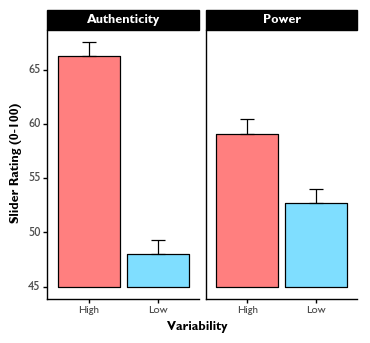

<ggplot: (176260320411)>

In [466]:
# Use plotnine package to plot using ggplot2 (R) style ...
# Manually recoding y-axis labels using 'slider_mean_45' variable (starting y-axis at zero doesn't look good):
(ggplot(plotData, aes(x='factor(variability)', y='slider_mean_45', fill='factor(variability)')) 
 + geom_errorbar(aes(ymax='slider_mean_45 + slider_sem', ymin='slider_mean_45'), position=position_dodge(width=0.9), width=0.2, color='black')
 + geom_bar(stat='identity', position=position_dodge(width=0.9), alpha=0.5, color='black')
 + scale_fill_manual(values=['red', 'deepskyblue'], guide=False)
 + facet_wrap('~ rating_type', nrow=1)
 + scale_y_continuous(labels=['45', '50', '55', '60', '65'])
 + labs(x='Variability', y='Slider Rating (0-100)')
 + theme_classic()
 + theme(figure_size = (4, 3.5),
         text = element_text(family='Gill Sans MT'),
         axis_text_x = element_text(size = 8),
         axis_title_x = element_text(size = 9, weight = 'bold'),
         axis_text_y = element_text(size = 9),
         axis_title_y = element_text(size = 9, weight = 'bold'),
         axis_line_x = element_line(color = 'black'),
         axis_line_y = element_line(color = 'black'),
         strip_text_x = element_text(weight = 'bold', color = 'white', size = 9), 
         strip_background = element_rect(fill = 'black')))